In [1]:
import re 
import pandas as pd 
import numpy as np 
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# loading packages/aliasing


In [2]:
Reviews = pd.read_csv("Reviews_Final.csv")
BPrice = pd.read_csv("BPrice_Final.csv")
# load in the Data Frames

In [3]:
Reviews.head()
# For reference while I am grouping and graphing

,Show_Name,Review_Date,Score,Review_Strength,Description,Reviewer,Critic_Name,Top10_Adjectives,Lowest_Price
0,Hamilton,"August 6th, 2015",100,positive,No Comment,Ben Brantley,The New York Times,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
1,Hamilton,"August 6th, 2015",100,positive,No Comment,Zachary Stewart,Theatermania,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
2,Hamilton,"August 6th, 2015",80,positive,No Comment,Elisabeth Vincentelli,New York Post,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
3,Hamilton,"August 7th, 2015",90,positive,No Comment,Michael Dale,BroadwayWorld,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
4,Hamilton,"August 6th, 2015",100,positive,No Comment,Marilyn Stasio,Variety,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0


In [4]:
BPrice.head()
# For reference while I am grouping and graphing

,Show_Name,Show_Duration,Theater,Capacity,Performance_Date,Performance_Month,Performance_Day,Performance_Time,Minimum_Price,Maximum_Price
0,Aladdin,"2hrs, 30mins",New Amsterdam Theatre,1801,2017-08-01,8,3,19:00:00,57.5,227.5
1,Aladdin,"2hrs, 30mins",New Amsterdam Theatre,1801,2017-08-02,8,4,13:00:00,57.5,215.5
2,Aladdin,"2hrs, 30mins",New Amsterdam Theatre,1801,2017-08-02,8,4,19:00:00,57.5,215.5
3,Aladdin,"2hrs, 30mins",New Amsterdam Theatre,1801,2017-08-03,8,5,19:00:00,57.5,215.5
4,Aladdin,"2hrs, 30mins",New Amsterdam Theatre,1801,2017-08-04,8,6,20:00:00,57.5,215.5


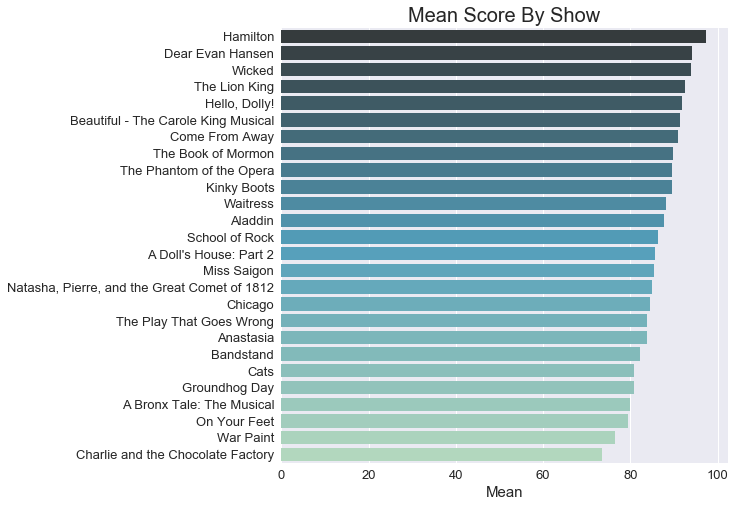

In [5]:
# First I am going to look at Show Scores

#1. Statistics grouped by each show.
Score_Metrics = Reviews.groupby(["Show_Name"], as_index = False).agg({"Score": ["mean", "median", "std"]})
# Groupby Name, apply mean, median, standard deviation to Score. 
Score_Metrics = Score_Metrics.sort_values(by=("Score", "mean"), ascending = False)
# Sort the data frame by mean
plt.rcParams['figure.figsize']=(8,8)
# Change the size of the plot 
Mean_Plot = sns.barplot(data = Score_Metrics, x = Score_Metrics.Score["mean"], y = Score_Metrics.Show_Name, palette = "GnBu_d")
# Make a barplot showing the mean score for each show. 
Mean_Plot.set_xlabel("Mean", fontsize = 15)
# Set the x axis label and font-size
Mean_Plot.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Mean_Plot.set_title("Mean Score By Show", fontsize = 20)
# set the title and font-size
Mean_Plot.tick_params(labelsize=13)
# Make the axis labels larger

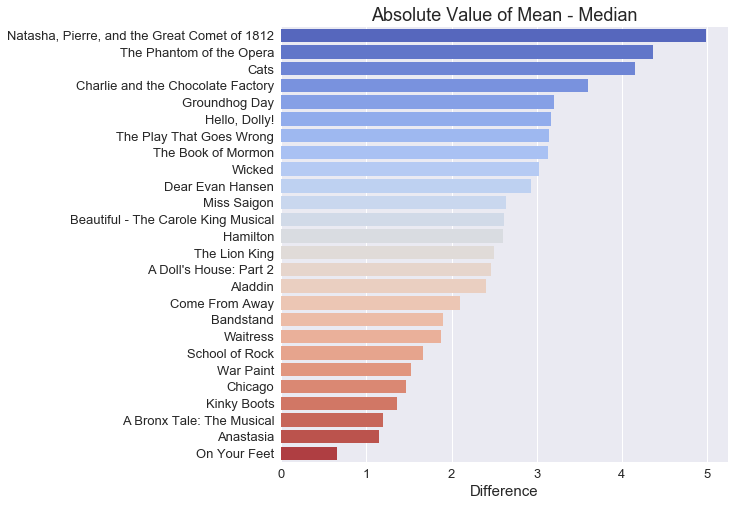

In [6]:
# Next, I want to look at the median and see if the mean is heavily affected. 

Score_Metrics2 = Reviews.groupby(["Show_Name"], as_index = False).agg({"Score": ["mean", "median", "std",\
                                                               lambda x: abs(np.mean(x) - np.median(x))]})
# Group by, agg, lambda function is mean - median
Score_Metrics2 = Score_Metrics2.sort_values(by=("Score", "<lambda>"), ascending = False)
# Sort the data frame by the lambda function of mean - median 
Mean_Plot2 = sns.barplot(data = Score_Metrics2, x = Score_Metrics2.Score["<lambda>"],\
                         y = Score_Metrics2.Show_Name, palette = "coolwarm")
# Make a barplot showing the mean score for each show. 
Mean_Plot2.set_xlabel("Difference", fontsize = 15)
# Set the x axis label and font-size
Mean_Plot2.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Mean_Plot2.set_title("Absolute Value of Mean - Median", fontsize = 18)
# Set the title and font-size
Mean_Plot2.tick_params(labelsize=13)
# Make the axis labels larger

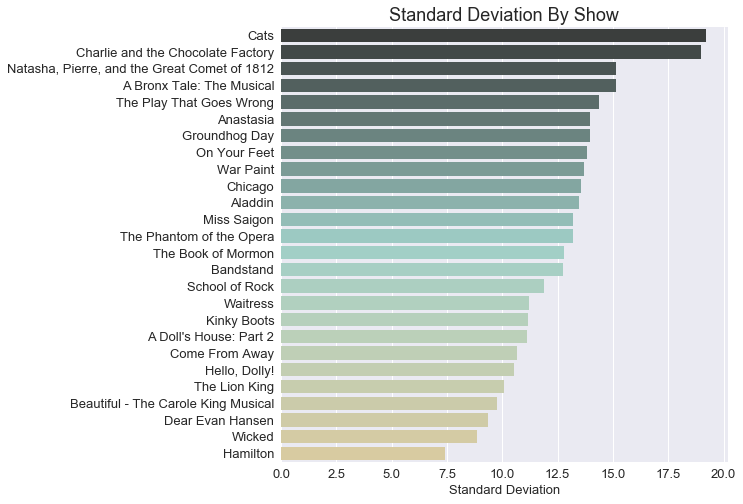

In [130]:
# Let's take a look at the standard deviations for the shows
Score_Metrics3 = Score_Metrics2.sort_values(by=("Score", "std"), ascending = False)
Std_Plot = sns.barplot(data = Score_Metrics3, x = Score_Metrics3.Score["std"],\
                         y = Score_Metrics3.Show_Name, palette ="BrBG_d")
Std_Plot.set_xlabel("Standard Deviation", fontsize = 13)
# Set the x axis label and font-size
Std_Plot.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Std_Plot.set_title("Standard Deviation By Show", fontsize = 18)
# set the title and font-size
Std_Plot.tick_params(labelsize=13)
# make the axis labels larger

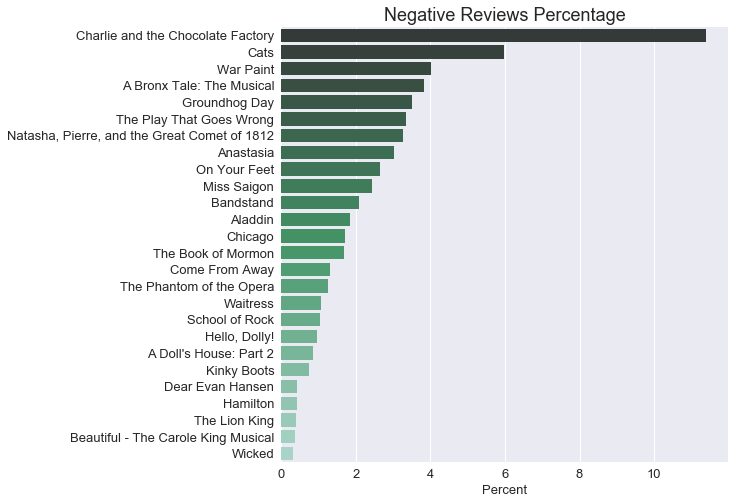

In [99]:
Score_Metrics4 = Reviews.groupby(["Show_Name", "Review_Strength"]).agg({"Score": "count"})
# Group by Show_Name and Review Strength, and aggregate count on Score

Score_Metrics5 = Score_Metrics4.groupby(["Show_Name"]).agg({"Score": "sum"})
# Another group by just for Show_Name with aggregate for sum on Score. Next I will join these two tables. 

Score_Metrics6 = pd.merge(Score_Metrics4, Score_Metrics5, left_index = True, right_index = True)
# Merge these two tables on the index
Score_Metrics6["Percent_Strength"] = Score_Metrics6.Score_x/Score_Metrics6.Score_y
# Calculate the Percentage each level of review strength takes up

Score_Metrics6 = Score_Metrics6.reset_index()
# reset the index
Score_Metrics_Negative = Score_Metrics6.loc[Score_Metrics6["Review_Strength"] == "negative"].sort_values\
                    ("Percent_Strength", ascending = False)
Percent_Plot = sns.barplot(data = Score_Metrics_Negative, x = Score_Metrics_Negative["Percent_Strength"]*100,\
                         y = Score_Metrics_Negative.Show_Name, palette ="BuGn_d")
Percent_Plot.set_xlabel("Percent", fontsize = 13)
# Set the x axis label and font-size
Percent_Plot.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Percent_Plot.set_title("Negative Reviews Percentage", fontsize = 18)
# set the title and font-size
Percent_Plot.tick_params(labelsize=13)
# make the axis labels larger

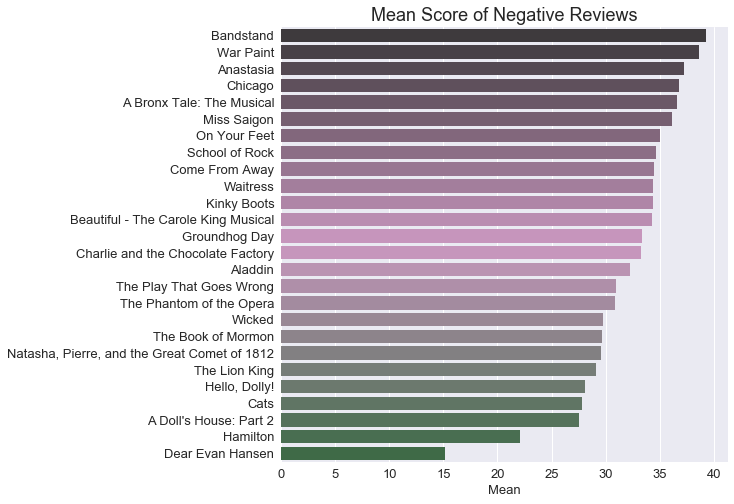

In [129]:
Score_Metrics7 = Reviews.groupby(["Show_Name", "Review_Strength"], as_index = False).agg({"Score": ["mean", "median", "std"]})
Score_Metrics_Negative2 = Score_Metrics7.loc[Score_Metrics7["Review_Strength"] == "negative"].sort_values(\
                    by=("Score", "mean"), ascending = False)
Mean_Plot3 = sns.barplot(data = Score_Metrics_Negative2, x = Score_Metrics_Negative2.Score["mean"], y = "Show_Name",\
            palette = "cubehelix_d")
Mean_Plot3.set_xlabel("Mean", fontsize = 13)
# Set the x axis label and font-size
Mean_Plot3.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Mean_Plot3.set_title("Mean Score of Negative Reviews", fontsize = 18)
# set the title and font-size
Mean_Plot3.tick_params(labelsize=13)
# make the axis labels larger

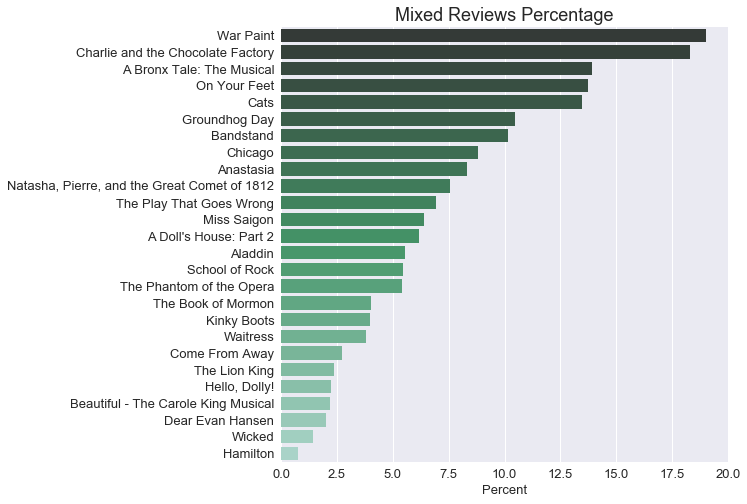

In [100]:
Score_Metrics_Mixed = Score_Metrics6.loc[Score_Metrics6["Review_Strength"] == "mixed"].sort_values\
                    ("Percent_Strength", ascending = False)
Percent_Plot2 = sns.barplot(data = Score_Metrics_Mixed, x = Score_Metrics_Mixed["Percent_Strength"]*100,\
                         y = Score_Metrics_Mixed.Show_Name, palette ="BuGn_d")
Percent_Plot2.set_xlabel("Percent", fontsize = 13)
# Set the x axis label and font-size
Percent_Plot2.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Percent_Plot2.set_title("Mixed Reviews Percentage", fontsize = 18)
# set the title and font-size
Percent_Plot2.tick_params(labelsize=13)
# make the axis labels larger

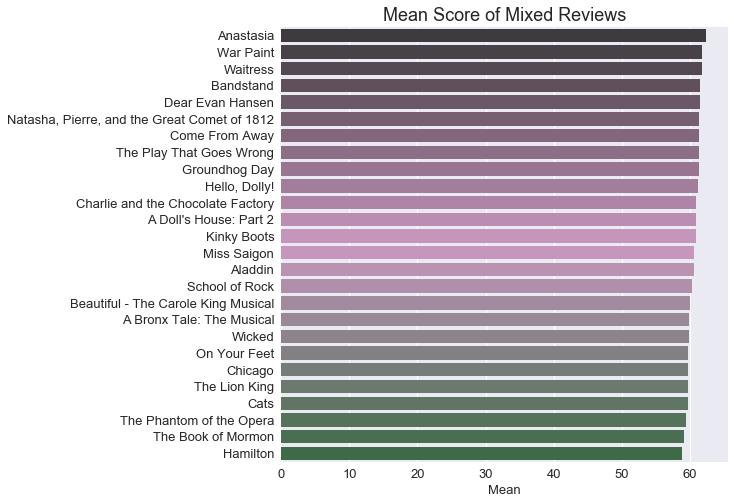

In [132]:
Score_Metrics_Mixed2 = Score_Metrics7.loc[Score_Metrics7["Review_Strength"] == "mixed"].sort_values(\
                    by=("Score", "mean"), ascending = False)
Mean_Plot4 = sns.barplot(data = Score_Metrics_Mixed2, x = Score_Metrics_Mixed2.Score["mean"], y = "Show_Name",\
            palette = "cubehelix_d")
Mean_Plot4.set_xlabel("Mean", fontsize = 13)
# Set the x axis label and font-size
Mean_Plot4.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Mean_Plot4.set_title("Mean Score of Mixed Reviews", fontsize = 18)
# set the title and font-size
Mean_Plot4.tick_params(labelsize=13)
# make the axis labels larger

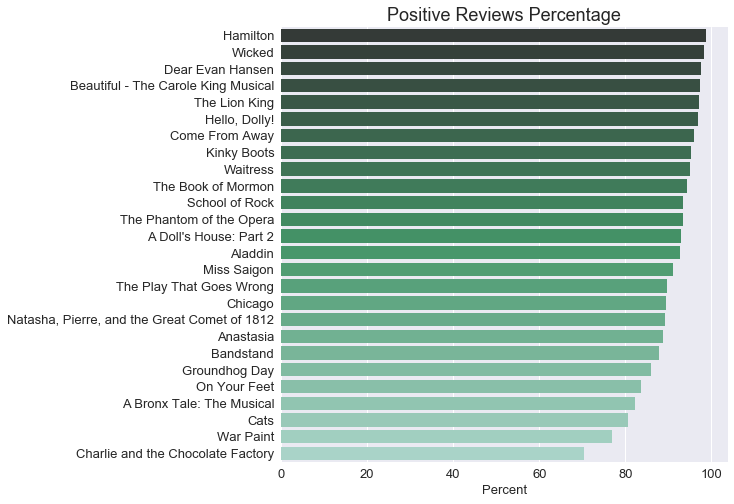

In [101]:
Score_Metrics_Positive = Score_Metrics6.loc[Score_Metrics6["Review_Strength"] == "positive"].sort_values\
                    ("Percent_Strength", ascending = False)
Percent_Plot3 = sns.barplot(data = Score_Metrics_Positive, x = Score_Metrics_Positive["Percent_Strength"]*100,\
                         y = Score_Metrics_Positive.Show_Name, palette ="BuGn_d")
Percent_Plot3.set_xlabel("Percent", fontsize = 13)
# Set the x axis label and font-size
Percent_Plot3.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Percent_Plot3.set_title("Positive Reviews Percentage", fontsize = 18)
# set the title and font-size
Percent_Plot3.tick_params(labelsize=13)
# make the axis labels larger

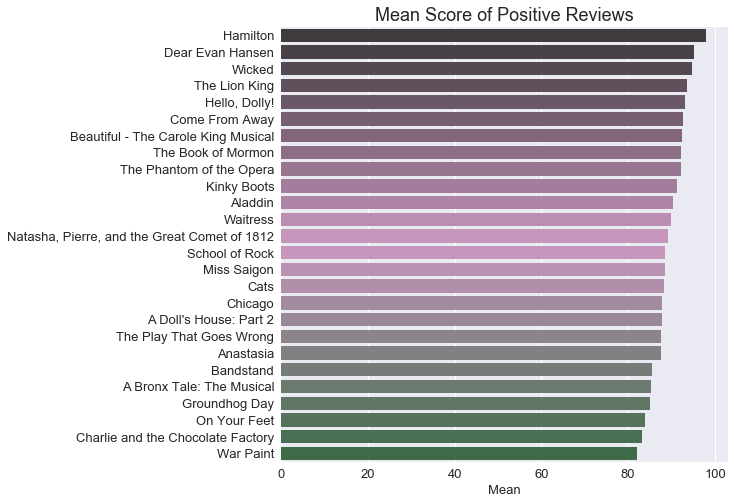

In [133]:
Score_Metrics_Positive2 = Score_Metrics7.loc[Score_Metrics7["Review_Strength"] == "positive"].sort_values(\
                    by=("Score", "mean"), ascending = False)
Mean_Plot5 = sns.barplot(data = Score_Metrics_Negative4, x = Score_Metrics_Negative4.Score["mean"], y = "Show_Name",\
            palette = "cubehelix_d")
Mean_Plot5.set_xlabel("Mean", fontsize = 13)
# Set the x axis label and font-size
Mean_Plot5.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Mean_Plot5.set_title("Mean Score of Positive Reviews", fontsize = 18)
# set the title and font-size
Mean_Plot5.tick_params(labelsize=13)
# make the axis labels larger

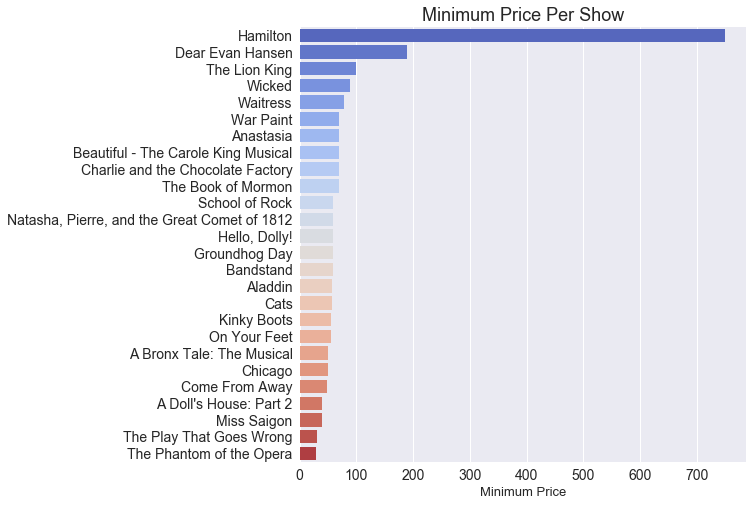

In [134]:
Price_Metrics = BPrice.groupby(["Show_Name"], as_index = False).agg({"Minimum_Price": "min"}).sort_values\
("Minimum_Price", ascending = False)
# Group_by Show_Name, aggregate with minimum of Minimum_Price
Price_Plot = sns.barplot(data = Price_Metrics, x = "Minimum_Price", y = "Show_Name", palette = "coolwarm")
# The grapgh is plotting the cheapest ticket price for all shows- for these shows, this is for every remaining
# performance until the end of the year. Notice that Hamilton is insanely expensive- this is because there are only 
# premium seats left, the most expensive possible. ALL normal seats for ALL shows until the end of the year are 
# SOLD OUT on this site. 
Price_Plot.set_xlabel("Minimum Price", fontsize = 13)
# Set the x axis label and font-size
Price_Plot.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Price_Plot.set_title("Minimum Price Per Show", fontsize = 18)
# set the title and font-size
Price_Plot.tick_params(labelsize=14)
# Make the axis labels larger

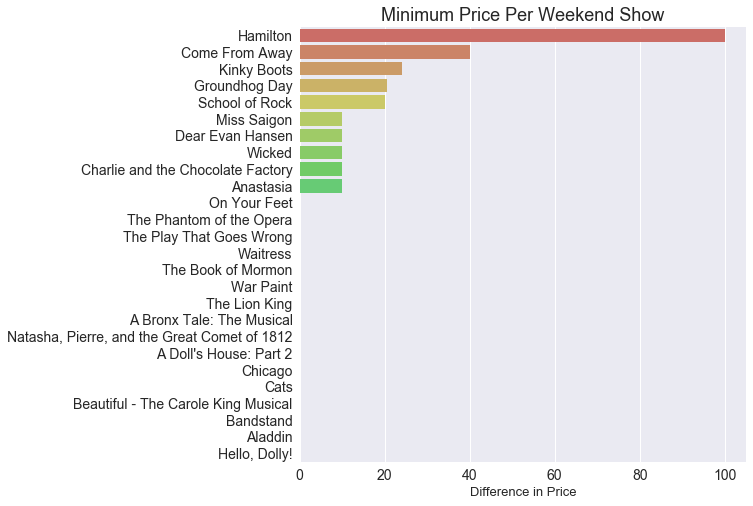

In [136]:
Price_Metrics2 = BPrice.loc[(BPrice.Performance_Day == 6) | (BPrice.Performance_Day == 7)].groupby\
(["Show_Name"], as_index = False).agg({"Minimum_Price": "min"}).sort_values("Minimum_Price", ascending = False)
# Prior to grouping I am filtering for Performance Day == 6 or 7- these are the weekend- Saturday and Sunday. 

Weekend_Differential = Price_Metrics2[["Minimum_Price"]] - Price_Metrics[["Minimum_Price"]]
# Subtracting this new minimum price from the one prior, which was the minimum for any show. 
Weekend_Differential = pd.merge(Weekend_Differential, Price_Metrics2[["Show_Name"]], left_index\
                                = True, right_index = True) 
# merging tables in order to get all the relevant columns into one single dataframe. 
Weekend_Differential = Weekend_Differential.sort_values("Minimum_Price", ascending = False)
# sorting the values in descending order
Price_Plot2 = sns.barplot(data = Weekend_Differential, x = "Minimum_Price", y = "Show_Name", palette = "hls")
# bar plot below of the difference in price between the cheapest weekend tickets and the cheapest ticket whenever.
Price_Plot2.set_xlabel("Difference in Price", fontsize = 13)
# Set the x axis label and font-size
Price_Plot2.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Price_Plot2.set_title("Minimum Price Per Weekend Show", fontsize = 18)
# set the title and font-size
Price_Plot2.tick_params(labelsize=14)
# Make the axis labels larger

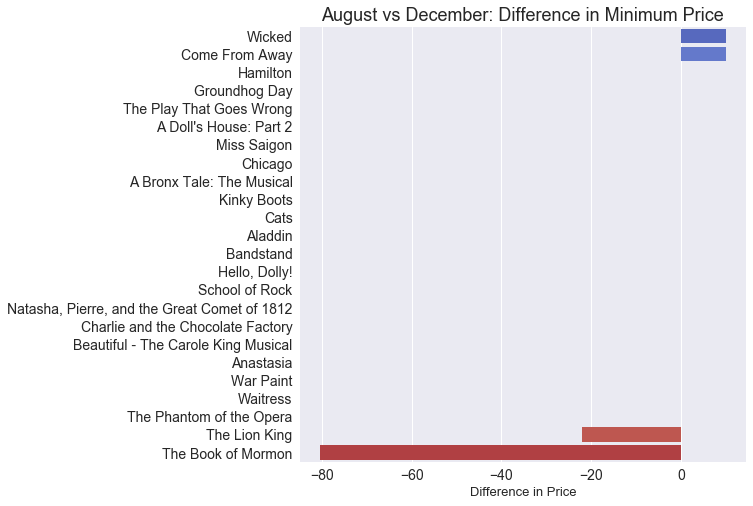

In [12]:
Price_August = BPrice.loc[(BPrice.Performance_Month == 8)].groupby\
(["Show_Name"], as_index = False).agg({"Minimum_Price": "min"}).sort_values("Minimum_Price", ascending = False)
# Prior # Prior to grouping I am filtering on Performance_Month = August

Price_December = BPrice.loc[(BPrice.Performance_Month == 12)].groupby\
(["Show_Name"], as_index = False).agg({"Minimum_Price": "min"}).sort_values("Minimum_Price", ascending = False)
# Prior # Prior to grouping I am filtering on Performance_Month = August 

Price_August = Price_August.loc[(Price_August["Show_Name"] != "Dear Evan Hansen") & \
                               (Price_August["Show_Name"] != "On Your Feet")]
# Filtering out these two shows because they are NA- Dear Evan Hansen is sold out through November, and 
# On Your Feet stops playing in August. 

Price_December = Price_December.loc[(Price_December["Show_Name"] != "On Your Feet") & \
                                   (Price_December["Show_Name"] != "Dear Evan Hansen")]
# Filtering out these two shows because they are NA- Dear Evan Hansen is sold out through November, and 
# On Your Feet stops playing in August. 

Month_Differential = pd.merge(Price_August, Price_December, left_on = "Show_Name",\
                              right_on = "Show_Name", how = "outer") 
# Joining the two so I have them in the same database for easier manipulation in a few steps.
Month_Differential.columns = ["Show_Name", "August_Minimum", "December_Minimum"]
# Renaming the columns
Month_Differential["Difference"] = Month_Differential["August_Minimum"] - Month_Differential["December_Minimum"]
# Creating a a New Column called "Difference" that is the difference in minimum price Between August and December. 
Month_Differential = Month_Differential.sort_values("Difference", ascending = False)
# Sorting the values in descending order. 
Price_Plot3 = sns.barplot(data = Month_Differential, x = "Difference", y = "Show_Name", palette = "coolwarm")
# Bar plot below of the difference in price between the cheapest ticket prices in August and the cheapest whenever. 
# I was expecting to see a fairly large gap here, as prices for shows usually are less expensive well in advance and 
# much more expensive closer to the show, but surprisngly there was almost no difference. 
Price_Plot3.set_xlabel("Difference in Price", fontsize = 13)
# Set the x axis label and font-size
Price_Plot3.set_ylabel("")
# No need for a y axis here it is self explanatory with the title and bar labels
Price_Plot3.set_title("August vs December: Difference in Minimum Price", fontsize = 18)
# set the title and font-size
Price_Plot3.tick_params(labelsize=14)
# Make the axis labels larger


In [13]:
Reviews.head()

,Show_Name,Review_Date,Score,Review_Strength,Description,Reviewer,Critic_Name,Top10_Adjectives,Lowest_Price
0,Hamilton,"August 6th, 2015",100,positive,No Comment,Ben Brantley,The New York Times,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
1,Hamilton,"August 6th, 2015",100,positive,No Comment,Zachary Stewart,Theatermania,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
2,Hamilton,"August 6th, 2015",80,positive,No Comment,Elisabeth Vincentelli,New York Post,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
3,Hamilton,"August 7th, 2015",90,positive,No Comment,Michael Dale,BroadwayWorld,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0
4,Hamilton,"August 6th, 2015",100,positive,No Comment,Marilyn Stasio,Variety,"[('Absorbing', 2459), ('Original', 1238), ('Am...",749.0


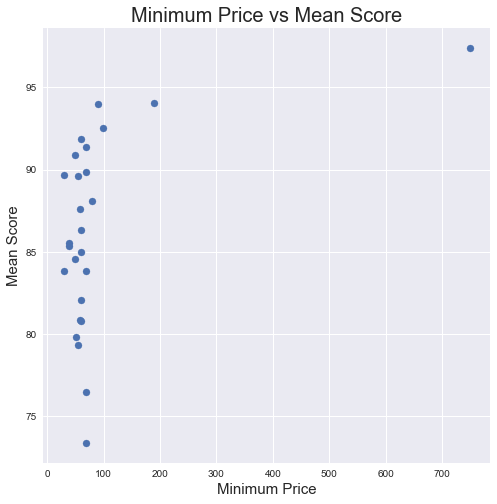

In [143]:
Combined_Metrics = Reviews.groupby(["Show_Name"], as_index = False).agg({"Score": ["mean", "median", "std"],\
                                                     "Lowest_Price": ["min"]})
Combined_Metrics = Combined_Metrics.sort_values(by = ("Lowest_Price", "min"))
Price_Scatter = plt.scatter(x = Combined_Metrics.Lowest_Price["min"], y = Combined_Metrics.Score["mean"])
plt.xlabel("Minimum Price", fontsize = 15)
plt.ylabel("Mean Score", fontsize = 15)
plt.title("Minimum Price vs Mean Score", fontsize=20)

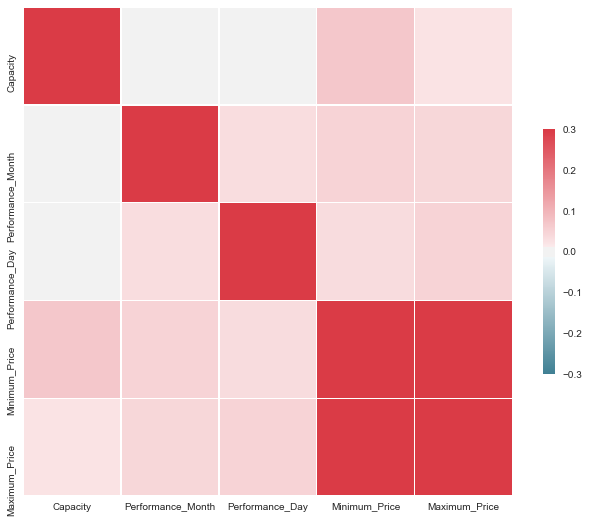

In [111]:
corr = BPrice.corr()
# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#created Corr-plot